In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# reading mnist dataset
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()
#According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

11493376/11490434 [==============================] - 499s 43us/step


In [4]:
#shape of the dataset
X_train.shape

(60000, 28, 28)

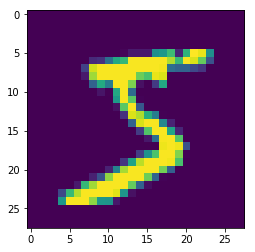

In [5]:
# first image in the MNIST dataset
plt.imshow(X_train[0])

In [6]:
#With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [7]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [8]:
#Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
#Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.
# one hot encode outputs
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

num_classes = Y_test.shape[1]
print(num_classes)

10


In [11]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 19s - loss: 0.1841 - accuracy: 0.9454 - val_loss: 0.0999 - val_accuracy: 0.9709
Epoch 2/10
 - 18s - loss: 0.0785 - accuracy: 0.9759 - val_loss: 0.0784 - val_accuracy: 0.9746
Epoch 3/10
 - 18s - loss: 0.0531 - accuracy: 0.9830 - val_loss: 0.0773 - val_accuracy: 0.9768
Epoch 4/10
 - 18s - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0643 - val_accuracy: 0.9828
Epoch 5/10
 - 18s - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0759 - val_accuracy: 0.9797
Epoch 6/10
 - 18s - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0803 - val_accuracy: 0.9802
Epoch 7/10
 - 18s - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.1036 - val_accuracy: 0.9749
Epoch 8/10
 - 18s - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0875 - val_accuracy: 0.9797
Epoch 9/10
 - 18s - loss: 0.0177 - accuracy: 0.9939 - val_loss: 0.0912 - val_accuracy: 0.9802
Epoch 10/10
 - 18s - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0903 - val_accuracy: 0.9803


In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))  

Accuracy: 0.9803000092506409% 
 Error: 0.01969999074935913


In [14]:
model.save('classification_model.h5')

In [15]:
from keras.models import load_model

In [16]:
pretrained_model = load_model('classification_model.h5')